In [1]:
# Neural Network
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
# Load the Data
combined_data = pd.read_csv("C:\\Users\\cb7en\\OneDrive\\Documentos\\Stats Master - Wei\\Project\\Monthly\\combined_data.csv", index_col='Date', parse_dates=True)

# check end of the data
combined_data.sort_index(inplace=True)

combined_data.index = pd.to_datetime(combined_data.index)

combined_data.head(5)

,Energy,Temeprature
Date,,
2002-05-31,11874901,11
2002-06-30,12185238,18
2002-07-31,14033343,24
2002-08-31,13748878,23
2002-09-30,12593138,20


In [13]:
# Calculate daily log returns
log_returns = np.log(combined_data['Energy'] / combined_data['Energy'].shift(1)).dropna()
# Estimate parameters
mu = log_returns.mean()  # Average daily return (drift)
sigma = log_returns.std()  # Daily volatility
S0 = combined_data['Energy'].iloc[-1].item() # Latest stock price
T = 12  # Predict n months
dt = 1  # Time step = 1 day
N = 1000  # Number of simulations

In [14]:
# Simulate Wiener process and Energy Demand paths
np.random.seed()  # No 42 added
t = np.arange(0, T + 1)
simulated_paths = np.zeros((N, T + 1))
simulated_paths[:, 0] = S0

In [15]:
for i in range(N):
    # Generate Wiener process increments (normal random variables)
    dW = np.random.normal(0, np.sqrt(dt), T)
    # Simulate GBM for each day
    for j in range(1, T + 1):
        drift = (mu - 0.5 * sigma**2) * dt
        diffusion = sigma * dW[j-1]
        simulated_paths[i, j] = simulated_paths[i, j-1] * np.exp(drift + diffusion)

# 5. Analyze results
mean_path = simulated_paths.mean(axis=0)
percentiles = np.percentile(simulated_paths, [5, 95], axis=0)

In [16]:
# Print predicted price on day n
print(f"Current Energy Demand: ${S0:,.2f}")
print(f"Predicted Monthly Total: ${mean_path[-1]:,.2f}")
print(f"5th-95th Percentile Range: ${percentiles[0][-1]:,.2f} - ${percentiles[1][-1]:,.2f}")

Current Energy Demand: $12,806,403.00
Predicted Monthly Total: $12,798,806.65
5th-95th Percentile Range: $7,822,797.02 - $19,558,959.37


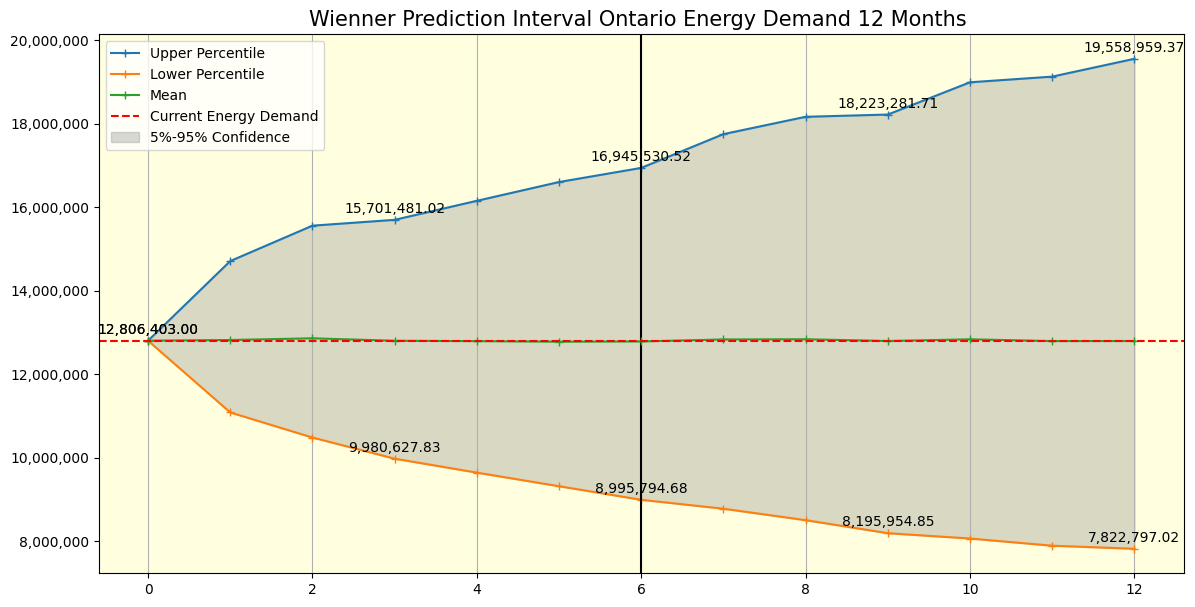

In [17]:
a5 = (14, 7)
fig, az = plt.subplots(figsize=a5)
az.plot(percentiles[1], marker="+", label="Upper Percentile")
az.set_facecolor('lightyellow')
indices = [0, 3, 6, 9, 12]  # [26, 52, 78]

for x, y in zip(indices, [percentiles[1][i] for i in indices]):
    az.annotate(f'{y:,.2f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

az.plot(percentiles[0], marker="+", label="Lower Percentile")

az.grid(axis = 'x')
for x in range(6, (6*2), 12):
    line = x
    plt.axvline(x = line,color='black')

az.plot(mean_path, marker="+", label="Mean")

for x, y in zip(indices, [percentiles[0][i] for i in indices]):
    az.annotate(f'{y:,.2f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

az.axhline(S0, color='red', linestyle='--', label='Current Energy Demand')
plt.fill_between(t, percentiles[0], percentiles[1], color='gray', alpha=0.3, label='5%-95% Confidence')
plt.title(f"Wienner Prediction Interval Ontario Energy Demand {int(len(mean_path)-1)} Months ",fontsize=15)
az.legend()

# Disable scientific notation on y-axis and add thousand separators
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
az.yaxis.set_major_formatter(formatter)
az.ticklabel_format(style='plain', axis='y')  # Alternative method
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))
)


plt.show()

A Wienner Process is a continuous-time stochastic process with independent and stationary increments. 
- Increments are normally distributed. 
- It's characterized by having independent, normally distributed increments.
- Each movement is independent of past movements.
- Often used to model random fluctuations or movements. 